# DATASET: List-of-Developing-Countries-2024_Updated
## Link: https://www.ica.org/app/uploads/2024/03/List-of-Developing-Countries-2024_Updated.pdf

<p style="text-align:right;">
<strong>By Isma Adlin Binti Ismail (24088157)</strong>
</p>


## 1. install pdfplumber to get pdf from link and extract word from pdf

In [4]:
!pip3 install pdfplumber pandas requests

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


## 2. Extract URL and Create New file

In [128]:
import requests
import pdfplumber
import pandas as pd

url = "https://www.ica.org/app/uploads/2024/03/List-of-Developing-Countries-2024_Updated.pdf"
pdf_path = "developing_countries.pdf"

response = requests.get(url)
with open(pdf_path, "wb") as f:
    f.write(response.content)

countries = []

with pdfplumber.open(pdf_path) as pdf:
    for page in pdf.pages:
        tables = page.extract_tables()
        for table in tables:
            if table:
                for row in table:
                    if row and "Country Name" not in row[0]:
                        country = row[0].strip()
                        if country:
                            countries.append(country)

df = pd.DataFrame(countries, columns=["Country"])
df

,Country
0,Afghanistan
1,Algeria
2,Angola
3,Argentina
4,Bangladesh
...,...
119,Venezuela (Bolivarian Republic of)
120,Viet Nam
121,Yemen
122,Zambia


## 3. Remove Duplicate Country

In [17]:
df_removeduplicate = df.drop_duplicates().reset_index(drop=True)
df_removeduplicate

,Country
0,Afghanistan
1,Algeria
2,Angola
3,Argentina
4,Bangladesh
...,...
107,Venezuela (Bolivarian Republic of)
108,Viet Nam
109,Yemen
110,Zambia


In [18]:
print("Number of row before remove duplicate:", len(df))
print("Number of row after remove duplicate:", len(df_removeduplicate))

Number of row before remove duplicate: 124
Number of row after remove duplicate: 112


## 4. Sort by Country

In [19]:
df_sort = df_removeduplicate.sort_values("Country").reset_index(drop=True)
df_sort

,Country
0,Afghanistan
1,Algeria
2,Angola
3,Argentina
4,Bangladesh
...,...
107,Venezuela (Bolivarian Republic of)
108,Viet Nam
109,Yemen
110,Zambia


#

# DATASET: Immunization by Country Year [Unicef]
## Link: https://data.unicef.org/resources/dataset/immunization/

<p style="text-align:right;">
<strong>By Isma Adlin Binti Ismail (24088157)</strong>
</p>

## 1. Load data from Excel

In [60]:
import pandas as pd

file_path = "Immunization by Country Year [Unicef].xlsx"

xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names

vaccine_sheets = sheet_names[:-1]   # all except last
last_sheet = sheet_names[-1]        # only last sheet

## 2. Combine All sheet (Immunization) exclude last sheet

In [123]:
Immunization = pd.DataFrame()

for sheet in vaccine_sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)

    # Assign correct vaccine type using sheet name
    temp_df["vaccine"] = sheet

    Immunization = pd.concat([Immunization, temp_df], ignore_index=True)

Immunization.head()

,unicef_region,iso3,country,vaccine,2024,2023,2022,2021,2020,2019,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
0,ROSA,AFG,Afghanistan,BCG,68.0,68.0,69.0,65.0,72.0,74.0,...,38.0,40.0,27.0,18.0,17.0,11.0,10.0,10.0,NaN,NaN
1,ECAR,ALB,Albania,BCG,99.0,99.0,99.0,99.0,98.0,99.0,...,94.0,92.0,92.0,92.0,92.0,90.0,90.0,92.0,93.0,93.0
2,MENA,DZA,Algeria,BCG,98.0,99.0,98.0,98.0,99.0,99.0,...,96.0,96.0,93.0,88.0,86.0,NaN,NaN,NaN,NaN,NaN
3,ESAR,AGO,Angola,BCG,68.0,80.0,67.0,61.0,62.0,72.0,...,47.0,32.0,29.0,32.0,28.0,28.0,25.0,NaN,NaN,NaN
4,LACR,ARG,Argentina,BCG,81.0,69.0,81.0,80.0,75.0,85.0,...,92.0,91.0,94.0,99.0,90.0,78.0,70.0,77.0,70.0,62.0


## 3. Last Sheet (Regional Global)

In [122]:
regional_global = pd.read_excel(file_path, sheet_name=last_sheet)
regional_global.head()

,region,vaccine,year,coverage,vaccinated,unvaccinated,target
0,Global,BCG,1980,15,"18,286,000","100,941,000","119,227,000"
1,Global,DTP1,1980,30,"35,740,000","83,462,000","119,202,000"
2,Global,DTP3,1980,20,"23,453,000","95,749,000","119,202,000"
3,Global,MCV1,1980,16,"19,102,000","100,100,000","119,202,000"
4,Global,POL3,1980,21,"25,207,000","93,995,000","119,202,000"


## 4. Drop duplicate for Immunization and Regional Global

In [118]:
# Drop duplicates for Immunization and regional global
Immunization_clean = Immunization.drop_duplicates().reset_index(drop=True)
Immunization_clean.head()

,region,vaccine,year,coverage,vaccinated,unvaccinated,target
0,Global,BCG,1980,15,"18,286,000","100,941,000","119,227,000"
1,Global,DTP1,1980,30,"35,740,000","83,462,000","119,202,000"
2,Global,DTP3,1980,20,"23,453,000","95,749,000","119,202,000"
3,Global,MCV1,1980,16,"19,102,000","100,100,000","119,202,000"
4,Global,POL3,1980,21,"25,207,000","93,995,000","119,202,000"


In [121]:
# Drop duplicates for regional global
regional_global_clean = regional_global.drop_duplicates().reset_index(drop=True)
regional_global_clean.head()

,region,vaccine,year,coverage,vaccinated,unvaccinated,target
0,Global,BCG,1980,15,"18,286,000","100,941,000","119,227,000"
1,Global,DTP1,1980,30,"35,740,000","83,462,000","119,202,000"
2,Global,DTP3,1980,20,"23,453,000","95,749,000","119,202,000"
3,Global,MCV1,1980,16,"19,102,000","100,100,000","119,202,000"
4,Global,POL3,1980,21,"25,207,000","93,995,000","119,202,000"


In [64]:
print("Number of row before remove duplicate Immunization:", len(Immunization))
print("Number of row after remove duplicate Immunization:", len(Immunization_clean))

Number of row before remove duplicate: 2437
Number of row after remove duplicate: 2437


In [83]:
print("Number of row before remove duplicate regional_global:", len(regional_global))
print("Number of row after remove duplicate regional_global:", len(regional_global_clean))

Number of row before remove duplicate regional_global: 4181
Number of row after remove duplicate regional_global: 4181


## 5. Immunization: Combine all year into one column 'year'

In [117]:
# Identify year columns
year_cols = [col for col in Immunization_clean.columns if col.isdigit()]

# Melt to long format
Immunization_year = pd.melt(
    Immunization_clean,
    id_vars=["unicef_region", "iso3", "country", "vaccine"],
    value_vars=year_cols,
    var_name="year",
    value_name="coverage"
)

Immunization_year.head()

,unicef_region,iso3,country,vaccine,year,coverage
0,ROSA,AFG,Afghanistan,BCG,2024,68.0
1,ECAR,ALB,Albania,BCG,2024,99.0
2,MENA,DZA,Algeria,BCG,2024,98.0
3,ESAR,AGO,Angola,BCG,2024,68.0
4,LACR,ARG,Argentina,BCG,2024,81.0


## 6. Immunization: Analyse Null value in Percentage and drop null value more than 50%

In [72]:
# NaN count per year
nan_by_year = Immunization_year.groupby("year")["coverage"] \
    .apply(lambda x: x.isna().sum()) \
    .reset_index(name="nan_count")

# Total rows per year (including NaN)
total_by_year = Immunization_year.groupby("year")["coverage"] \
    .size() \
    .reset_index(name="total_rows")

# Merge + compute percentage
year_stats = nan_by_year.merge(total_by_year, on="year")
year_stats["nan_percent"] = (year_stats["nan_count"] / year_stats["total_rows"]) * 100

year_stats


,year,nan_count,total_rows,nan_percent
0,1980,1978,2437,81.165367
1,1981,1866,2437,76.569553
2,1982,1818,2437,74.599918
3,1983,1751,2437,71.850636
4,1984,1702,2437,69.839967
5,1985,1667,2437,68.403775
6,1986,1649,2437,67.665162
7,1987,1632,2437,66.967583
8,1988,1621,2437,66.516208
9,1989,1614,2437,66.228970


In [124]:
bad_years = year_stats[year_stats["nan_percent"] > 50]["year"].tolist()

Immunization_year_clean = Immunization_year[~Immunization_year["year"].isin(bad_years)]
Immunization_year_clean = Immunization_year_clean.reset_index(drop=True)
Immunization_year_clean.head()

,unicef_region,iso3,country,vaccine,year,coverage
0,ROSA,AFG,Afghanistan,BCG,2024,68.0
1,ECAR,ALB,Albania,BCG,2024,99.0
2,MENA,DZA,Algeria,BCG,2024,98.0
3,ESAR,AGO,Angola,BCG,2024,68.0
4,LACR,ARG,Argentina,BCG,2024,81.0


In [76]:
print("Number of row before remove null value by year group:", len(Immunization_year))
print("Number of row after remove null value by year group:", len(Immunization_year_clean))

Number of row before remove null valueby year group: 109665
Number of row after remove null value by year group: 60925


## 7. Regional Global: Only take global dataset

In [87]:
#List of region
for r in regional_global_clean["region"].unique():
    print(r)

Global
EAPR
ECAR
ESAR
LACR
MENA
Non-programme
ROSA
WCAR


In [185]:
#Take only global
global_only = regional_global[regional_global["region"] == "Global"].reset_index(drop=True)
global_only.head()

,region,vaccine,year,coverage,vaccinated,unvaccinated,target
0,Global,BCG,1980,15,"18,286,000","100,941,000","119,227,000"
1,Global,DTP1,1980,30,"35,740,000","83,462,000","119,202,000"
2,Global,DTP3,1980,20,"23,453,000","95,749,000","119,202,000"
3,Global,MCV1,1980,16,"19,102,000","100,100,000","119,202,000"
4,Global,POL3,1980,21,"25,207,000","93,995,000","119,202,000"


In [192]:
print("Number of row before remove other than global:", len(regional_global))
print("Number of row after remove other than global:", len(global_only))

Number of row before remove other than global: 4181
Number of row after remove other than global: 482


## 8. Regional Global: Change data type

In [197]:
import pandas as pd

numeric_cols = ["vaccinated", "unvaccinated", "target"]

# Delete unwanted symbol and value
def clean_numeric(col):
    return (
        col.astype(str)
           .str.replace(",", "", regex=False)     # remove commas
           .str.replace(" ", "", regex=False)     # remove spaces
           .str.replace(r"[^0-9\-\.]", "", regex=True)  # remove any non-number symbol
           .astype("Int64")                       # convert safely
    )

for col in numeric_cols:
    global_only[col] = clean_numeric(global_only[col])

# Convert to numeric columns
global_only["year"] = pd.to_numeric(global_only["year"], errors="coerce").astype("Int64")
global_only["coverage"] = pd.to_numeric(global_only["coverage"], errors="coerce").astype("Int64")


print(global_only.info())
global_only.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region        482 non-null    object
 1   vaccine       482 non-null    object
 2   year          482 non-null    Int64 
 3   coverage      482 non-null    Int64 
 4   vaccinated    482 non-null    Int64 
 5   unvaccinated  482 non-null    Int64 
 6   target        482 non-null    Int64 
dtypes: Int64(5), object(2)
memory usage: 28.8+ KB
None


,region,vaccine,year,coverage,vaccinated,unvaccinated,target
0,Global,BCG,1980,15,18286000,100941000,119227000
1,Global,DTP1,1980,30,35740000,83462000,119202000
2,Global,DTP3,1980,20,23453000,95749000,119202000
3,Global,MCV1,1980,16,19102000,100100000,119202000
4,Global,POL3,1980,21,25207000,93995000,119202000


#

# DATASET: Life Expectancy [World Bank]  
## Link: https://data.worldbank.org/indicator/SP.DYN.LE00.IN

<p style="text-align:right;">
<strong>By Wan Mahirah binti Wan Mashruhim (24221902)</strong>
</p>


## 1. Load data from CSV

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
df = pd.read_csv('Life Expectancy [World Bank].csv', skiprows=3)
df_ori = df
# display basic info
print("Dataset shape: ", df.shape)
print("\nFirst few rows: ")
df.head()

Dataset shape:  (266, 70)

First few rows: 


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.049000,64.215000,64.602000,64.944000,65.303000,65.615000,...,75.540000,75.620000,75.880000,76.019000,75.406000,73.655000,76.226000,76.353000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.169658,44.468838,44.877890,45.160583,45.535695,45.770723,...,62.167981,62.591275,63.330691,63.857261,63.766484,62.979999,64.487020,65.146291,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.799000,33.291000,33.757000,34.201000,34.673000,35.124000,...,62.646000,62.406000,62.443000,62.941000,61.454000,60.417000,65.617000,66.035000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.779636,38.058956,38.681792,38.936918,39.194580,39.479784,...,56.392452,56.626439,57.036976,57.149847,57.364425,57.362572,57.987813,58.855722,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.933000,36.902000,37.168000,37.419000,37.704000,37.968000,...,61.619000,62.122000,62.622000,63.051000,63.116000,62.958000,64.246000,64.617000,NaN,NaN


## 2. Check dataset structure

In [224]:
# check dataset structure
print("Column names: ")
print(df.columns.tolist())
print("\nDataset info: ")
df.info()

Column names: 
['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'Unnamed: 69']

Dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null  

## 3. Check missing value in column and drop the column

In [225]:
# check missing value
print("Missing values per column: ")
missingValues = df.isnull().sum()
print(missingValues[missingValues > 0])

Missing values per column: 
1960             3
1961             2
1962             2
1963             3
1964             3
              ... 
2021             1
2022             1
2023             1
2024           266
Unnamed: 69    266
Length: 66, dtype: int64


In [226]:
#drop unneccessary column
columnToDrop = [column for column in df.columns if df[column].isnull().sum() == len(df)]
print(f"Columns to drop (to completely empty): {columnToDrop}")
#  drop completely empty column
df_clean = df.drop(columns=columnToDrop, errors='ignore')

Columns to drop (to completely empty): ['2024', 'Unnamed: 69']


## 4. Check duplicate and drop duplicate if any

In [227]:
#check duplicate rows
print(f"Duplicate rows: {df_clean.duplicated().sum()}")

Duplicate rows: 0


## 5. Rename column and convert data type

In [228]:
# rename columns
df_clean = df_clean.rename(columns={
    'Country Name': 'country',
    'Country Code': 'country_code',
    'Indicator Name': 'indicator_name',
    'Indicator Code': 'indicator_code'
})

In [229]:
# check data types & convert year columns to numeric
yearColumn = [column for column in df_clean.columns if column not in ['country', 'country_code', 'indicator_name', 'indicator_code']]

#  convert year column to numeric
for column in yearColumn:
    df_clean[column] = pd.to_numeric(df_clean[column], errors='coerce')

print(f"Year columns converted to numeric: {len(yearColumn)} columns")

Year columns converted to numeric: 64 columns


## 6. Combine column year into one column 'year'

In [230]:
# reshape data
df_long = pd.melt(
    df_clean,
    id_vars=['country', 'country_code', 'indicator_name', 'indicator_code'],
    value_vars=yearColumn,
    var_name='year',
    value_name='life_expectancy'
)

# convert year to int
df_long['year'] = df_long['year'].astype(int)
print("Long format dataset shape: ", df_long.shape)
df_long.head()

Long format dataset shape:  (17024, 6)


,country,country_code,indicator_name,indicator_code,year,life_expectancy
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,64.049000
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,44.169658
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,32.799000
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,37.779636
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,37.933000


## 7. Analyse missing data and drop with missing data more than (>1)

Text(0, 0.5, 'No. of Missing Values')

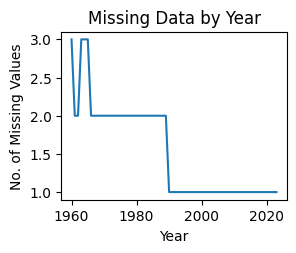

In [231]:
# missing data by year
plt.subplot(2,2,1)
missingByYear = df_long.groupby('year')['life_expectancy'].apply(lambda x: x.isnull().sum())
missingByYear.plot(kind='line', title='Missing Data by Year')
plt.xlabel('Year')
plt.ylabel('No. of Missing Values')

In [232]:
# What year to drop
missingByYear = missingByYear.reset_index()
missingByYear.columns = ["year", "missing_count"]
bad_years = missingByYear[missingByYear["missing_count"] > 1.5]["year"].tolist()
print("Years to drop:", bad_years)


Years to drop: [1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]


In [233]:
missingByYear

,year,missing_count
0,1960,3
1,1961,2
2,1962,2
3,1963,3
4,1964,3
...,...,...
59,2019,1
60,2020,1
61,2021,1
62,2022,1


In [234]:
life_expectancy = df_long[~df_long["year"].isin(bad_years)].reset_index(drop=True)
life_expectancy.head()

,country,country_code,indicator_name,indicator_code,year,life_expectancy
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,72.546000
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,51.096326
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,45.118000
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,48.459295
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,41.854000


#

# FINALIZE ALL DATA COMBINE WITH LIST OF DEVELOPING COUNTRY
<p style="text-align:right;">
<strong>By Isma Adlin Binti Ismail (24088157)</strong>
</p>

## 1. Drop Country not in the list of Developing Country

In [235]:
#PRINT DEVELOPING COUNTRY

developing_list = df_sort["Country"].str.title().tolist()
developing_list

['Afghanistan',
 'Algeria',
 'Angola',
 'Argentina',
 'Bangladesh',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State Of)',
 'Botswana',
 'Brazil',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Cuba',
 'Côte D’Ivoire',
 'Democratic People’S Republic Of Korea',
 'Democratic Republic Of The Congo',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypte',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'India',
 'Indonesia',
 'Iran (Islamic Republic Of)',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kenya',
 'Kiribati',
 'Lao People’S Democratic Republic',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Mongolia',
 'Moro

## Immunization Data

In [236]:
# 1. Standardize country name in Immunization_clean
Immunization_year_clean["country"] = Immunization_year_clean["country"].str.title()

# 2. Filter rows to keep ONLY countries in developing_list
Immunization_developing = Immunization_year_clean[Immunization_year_clean["country"].isin(developing_list)]

# 3. Reset index after filtering
Immunization_developing = Immunization_developing.reset_index(drop=True)

Immunization_developing

,unicef_region,iso3,country,vaccine,year,coverage
0,ROSA,AFG,Afghanistan,BCG,2024,68.0
1,MENA,DZA,Algeria,BCG,2024,98.0
2,ESAR,AGO,Angola,BCG,2024,68.0
3,LACR,ARG,Argentina,BCG,2024,81.0
4,ROSA,BGD,Bangladesh,BCG,2024,99.0
...,...,...,...,...,...,...
34095,LACR,SUR,Suriname,YFV,2000,NaN
34096,WCAR,TGO,Togo,YFV,2000,NaN
34097,LACR,TTO,Trinidad And Tobago,YFV,2000,91.0
34098,ESAR,UGA,Uganda,YFV,2000,NaN


In [237]:
print("Number of row for all country:", len(Immunization_year_clean))
print("Number of row for developing country:", len(Immunization_developing))

Number of row for all country: 60925
Number of row for developing country: 34100


## Life Expectancy Data

In [238]:
# 1. Standardize country name in Immunization_clean
life_expectancy["country"] = life_expectancy["country"].str.title()

# 2. Filter rows to keep ONLY countries in developing_list
life_expectancy_developing = life_expectancy[life_expectancy["country"].isin(developing_list)]

# 3. Reset index after filtering
life_expectancy_developing = life_expectancy_developing.reset_index(drop=True)

life_expectancy_developing

,country,country_code,indicator_name,indicator_code,year,life_expectancy
0,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,45.118
1,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,41.854
2,Argentina,ARG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,71.615
3,Burundi,BDI,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,45.184
4,Benin,BEN,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,53.020
...,...,...,...,...,...,...
3259,Vanuatu,VUT,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2023,71.477
3260,Samoa,WSM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2023,71.698
3261,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2023,66.139
3262,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2023,66.349


In [239]:
print("Number of row for all country:", len(life_expectancy))
print("Number of row for developing country:", len(life_expectancy_developing))

Number of row for all country: 9044
Number of row for developing country: 3264


#

# ANALYSIS FINAL DATA

<div style="text-align:right;">
<strong>By Isma Adlin Binti Ismail (24088157)</strong><br>
<strong>By Wan Mahirah binti Wan Mashruhim (24221902)</strong>
</div>


## 1. Immunization Developing Country

In [177]:
#  check unrealistic immunization value
print("immunization value statistics: ")
print(Immunization_developing['coverage'].describe())

immunization value statistics: 
count    24685.000000
mean        81.007292
std         18.512057
min          0.000000
25%         73.000000
50%         87.000000
75%         95.000000
max         99.000000
Name: coverage, dtype: float64


In [178]:
#  summary statistics country
summaryStats = Immunization_developing.groupby('country')['coverage'].agg(['count','mean','std','min','max']).round(2)

print("Summary statistics by country: ")
print(summaryStats.sort_values('count', ascending=True).head(10))

Summary statistics by country: 
                   count   mean    std   min   max
country                                           
South Sudan          104  60.91  12.96   3.0  79.0
Somalia              164  49.92  14.36   2.0  79.0
Equatorial Guinea    169  59.35  14.79   2.0  88.0
Comoros              182  76.04  10.95   8.0  98.0
Timor-Leste          186  75.24  10.84  30.0  95.0
Gabon                191  69.14  13.96  15.0  97.0
Guinea               199  57.14  13.89   3.0  93.0
Ethiopia             201  60.85  11.43  12.0  84.0
Vanuatu              202  74.96  13.12   4.0  97.0
Haiti                202  62.58  14.24   0.0  88.0


In [179]:
# Overview of cleaned dataset
print("Immunization Developing Country")
print(f"Time period covered: {Immunization_developing['year'].min()} - {Immunization_developing['year'].max()}")
print(f"Number of countries: {Immunization_developing['country'].nunique()}")
print(f"Total observations: {len(Immunization_developing)}")
print(f"Non-missing values: {Immunization_developing['coverage'].notnull().sum()}")
print(f"Missing values: {Immunization_developing['coverage'].isnull().sum()}")

# calculate data completeness
completeness = (Immunization_developing['coverage'].notnull().sum() / len(Immunization_developing)) * 100
print(f"Data completeness: {completeness:.2f}%")


Immunization Developing Country
Time period covered: 2000 - 2024
Number of countries: 105
Total observations: 34100
Non-missing values: 24685
Missing values: 9415
Data completeness: 72.39%


## 2. Global Immunization

In [212]:
#  check unrealistic value
print("Global immunization value statistics:")
print(global_only[['coverage', 'vaccinated', 'unvaccinated', 'target']].describe())


Global immunization value statistics:
        coverage       vaccinated     unvaccinated            target
count      482.0            482.0            482.0             482.0
mean   53.614108  68683057.053942  55808755.186722  124491819.502075
std    28.910653  40809243.190797   37888220.72726   27158562.115271
min          0.0            100.0       12858000.0        27278000.0
25%         27.0       27217000.0       22742000.0       127859000.0
50%         63.0       81925500.0       37844000.0       130668000.0
75%         81.0      105657000.0       89003750.0       136501250.0
max         90.0      126473000.0      135800000.0       145605000.0


In [213]:
print("Summary statistics by vaccine:\n")

# Sort by vaccine name
summaryStats = summaryStats.sort_index()

# Slice first 10 rows FIRST
top10 = summaryStats.iloc[:10]

# Apply styling
styled_summary = top10.style.set_table_styles([
    {"selector": "th.col_heading.level0",
     "props": "font-weight: bold; font-size: 14px;"}
])

# Display properly
display(styled_summary)


Summary statistics by vaccine:



In [216]:
# Overview of cleaned dataset
print("Global Immunization")
print(f"Time period covered: {global_only['year'].min()} - {global_only['year'].max()}")
print(f"Number of vaccine: {global_only['vaccine'].nunique()}")
print(f"Total observations: {len(global_only)}")

# calculate data completeness
completeness1 = (global_only['coverage'].notnull().sum() / len(global_only)) * 100
completeness2 = (global_only['vaccinated'].notnull().sum() / len(global_only)) * 100
completeness3 = (global_only['unvaccinated'].notnull().sum() / len(global_only)) * 100
completeness4 = (global_only['target'].notnull().sum() / len(global_only)) * 100
print(f"Data completeness coverage: {completeness1:.2f}%")
print(f"Data completeness vaccinated: {completeness2:.2f}%")
print(f"Data completeness unvaccinated: {completeness3:.2f}%")
print(f"Data completeness target: {completeness4:.2f}%")


Global Immunization
Time period covered: 1980 - 2024
Number of vaccine: 16
Total observations: 482
Data completeness coverage: 100.00%
Data completeness vaccinated: 100.00%
Data completeness unvaccinated: 100.00%
Data completeness target: 100.00%


## 3. Life Expectancy Developing Country

In [221]:
# check data quality

#  check unrealistic life expectancy value
print("Life expectancy value statistics: ")
print(life_expectancy_developing['life_expectancy'].describe())

# identify potential outliers
outlier = life_expectancy_developing[(life_expectancy_developing['life_expectancy'] < 20) | (life_expectancy_developing['life_expectancy'] > 100)]
print(f"\nPotential outliers (Life expectancy <20 or >100): {len(outlier)}")

if len(outlier) > 0:
    print("\nOutlier details: ")
    print(outlier[['country', 'year', 'life_expectancy']].head(10))

Life expectancy value statistics: 
count    3264.000000
mean       63.765748
std         9.062446
min        12.158000
25%        58.059500
50%        65.095000
75%        70.918750
max        81.041000
Name: life_expectancy, dtype: float64

Potential outliers (Life expectancy <20 or >100): 4

Outlier details: 
                       country  year  life_expectancy
454                     Rwanda  1994           12.158
844                South Sudan  1998           19.048
1835  Central African Republic  2009           14.665
3083  Central African Republic  2022           18.818


In [222]:
# create summary statistics
summaryStats = life_expectancy_developing.groupby('country')['life_expectancy'].agg(['count','mean','std','min','max']).round(2)

print("Summary statistics by country: ")
print(summaryStats.sort_values('count', ascending=True).head(10))

Summary statistics by country: 
                  count   mean   std    min    max
country                                           
Afghanistan          34  57.53  5.53  45.12  66.04
Paraguay             34  71.11  2.08  67.34  73.84
Papua New Guinea     34  62.64  1.82  59.78  66.13
Pakistan             34  63.43  2.44  59.73  67.65
Nigeria              34  49.60  2.97  45.48  54.46
Niger                34  53.16  6.23  41.73  61.18
Nicaragua            34  69.36  3.81  62.47  74.95
Nepal                34  64.51  4.40  54.77  70.35
Namibia              34  57.74  4.15  51.92  67.39
Myanmar              34  62.13  3.24  56.36  66.89


In [240]:
# final overview of cleaned dataset
print("LIFE EXPECTANCY [WORLD BANK] - CLEANED")
print(f"Original shape: {df_ori.shape}")
print(f"Time period covered: {life_expectancy_developing['year'].min()} - {life_expectancy_developing['year'].max()}")
print(f"Number of countries: {life_expectancy_developing['country'].nunique()}")


LIFE EXPECTANCY [WORLD BANK] - CLEANED
Original shape: (266, 70)
Time period covered: 1990 - 2023
Number of countries: 96


In [241]:
# create data quality report
def createDataQualityReport(life_expectancy_developing):
    """Generate efficient data quality report"""

    report = {
        'total_countries': life_expectancy_developing['country'].nunique(),
        'total_years': life_expectancy_developing['year'].nunique(),
        'total_observations': len(life_expectancy_developing),
        'non_missing_value': life_expectancy_developing['life_expectancy'].isnull().sum(),
        'missing_value': life_expectancy_developing['life_expectancy'].notnull().sum(),
        'completeness_rate': (life_expectancy_developing['life_expectancy'].notnull().sum() / len(life_expectancy_developing)) * 100,
        'min_year': life_expectancy_developing['year'].min(),
        'max_year': life_expectancy_developing['year'].max(),
        'min_life_expectancy': life_expectancy_developing['life_expectancy'].min(),
        'max_life_expectancy': life_expectancy_developing['life_expectancy'].max(),
        'mean_life_expectancy': life_expectancy_developing['life_expectancy'].mean(),
        'country_with_complete_data': len(life_expectancy_developing.groupby('country')['life_expectancy'].apply(lambda x: x.notnull().all()))
    }

    return report

reportQuality = createDataQualityReport(life_expectancy_developing)
print(" DATA QUALITY REPORT ")
for key, value in reportQuality.items():
    print(f"{key.replace('_', ' ').title()}: {value}")

 DATA QUALITY REPORT 
Total Countries: 96
Total Years: 34
Total Observations: 3264
Non Missing Value: 0
Missing Value: 3264
Completeness Rate: 100.0
Min Year: 1990
Max Year: 2023
Min Life Expectancy: 12.158
Max Life Expectancy: 81.041
Mean Life Expectancy: 63.765747601327114
Country With Complete Data: 96


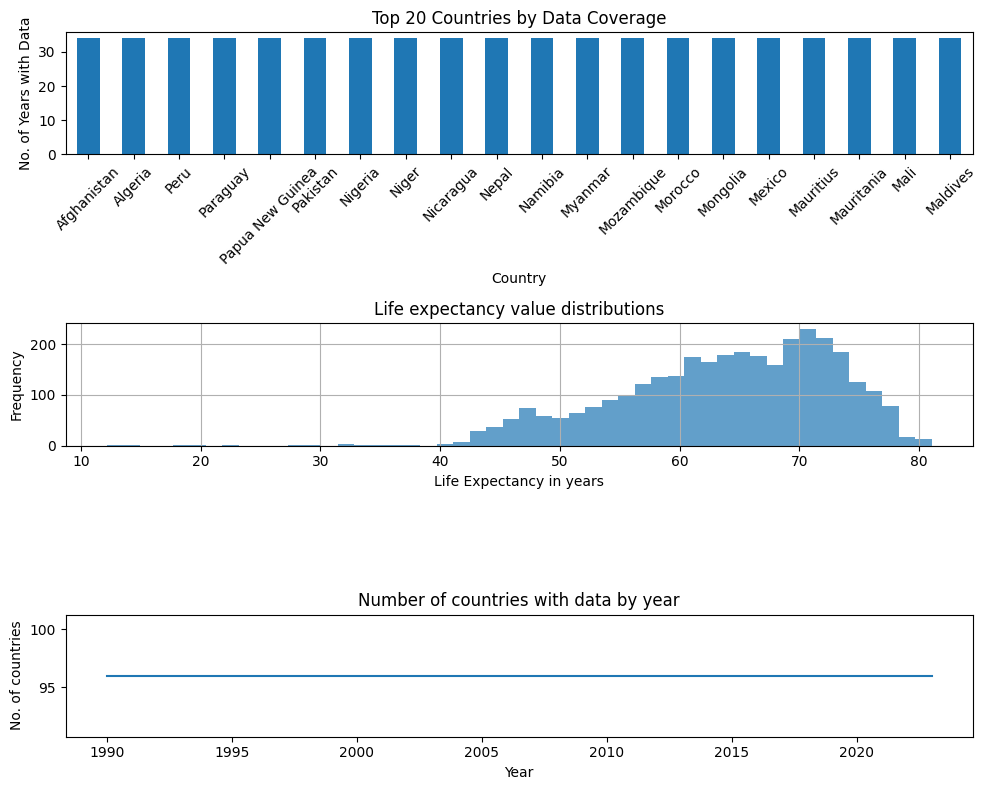

In [246]:
# additional visualization for data quality assessment
plt.figure(figsize=(10, 8)) 

# plot 1: data coverage by country (top 20 countries w most data)
plt.subplot(3,1,1)
dataCoverage = life_expectancy_developing.groupby('country')['life_expectancy'].count().sort_values(ascending=False).head(20)
dataCoverage.plot(kind='bar', title='Top 20 Countries by Data Coverage')
plt.xlabel('Country')
plt.ylabel('No. of Years with Data')
plt.xticks(rotation=45)

# plot 2: life expectancy distribution
plt.subplot(3,1,2)
life_expectancy_developing['life_expectancy'].hist(bins=50, alpha=0.7)
plt.title('Life expectancy value distributions')
plt.xlabel('Life Expectancy in years')
plt.ylabel('Frequency')

# plot 3: no. of countries w/ data per year
plt.subplot(3,1,3)
countriesByYear = life_expectancy_developing.groupby('year')['life_expectancy'].apply(lambda x: x.notnull().sum())
countriesByYear.plot(kind='line', title= 'Number of countries with data by year')
plt.xlabel('Year')
plt.ylabel('No. of countries')

plt.tight_layout()
plt.show()

#

# EXPORT DATA INTO CSV FILE ONE ZIP FOLDER

<p style="text-align:right;">
<strong>By Isma Adlin Binti Ismail (24088157)</strong>
</p>

In [247]:
#Export dataframe into csv file
Immunization_developing.to_csv("immunization_developing_country.csv", index=False)
life_expectancy.to_csv("life_expectancy_developing_country.csv", index=False)
global_only.to_csv("immunization_global.csv", index=False)

#Bundle both file and zip
import zipfile

zip_filename = "finalize_data_cleaning.zip"

files_to_zip = [
    "immunization_developing_country.csv",
    "life_expectancy_developing_country.csv",
    "immunization_global.csv"
]

with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for file in files_to_zip:
        zipf.write(file)

zip_filename

'finalize_data_cleaning.zip'